In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE ,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,precision_recall_curve
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

In [6]:
data= pd.read_csv("EDHS2019.csv",sep=',',index_col='id')

In [7]:
#Preprocessing
#Exploratory Data Analysis

In [8]:
data.sort_index()

,VitaminA,caseid,midx,age_mother,region,place_residence,mother_educ,source_drink_water,toilet_facility,electricity,...,mother_edu,water_piped,toile_improved,electriciti,radioi,televisioni,head_fem,telephonei,wealth_indexi,child_fem
id,,,,,,,,,,,,,,,,,,,,,
3,0,00010021 02,1,26,tigray,urban,secondary,piped into dwelling,pit latrine with slab,yes,...,1,1,0,1,0,1,0,0,5,1
4,1,00010047 02,1,28,tigray,urban,secondary,piped into dwelling,pit latrine without slab/open pit,yes,...,1,1,0,1,0,1,0,0,5,1
5,1,00010054 02,1,27,tigray,urban,secondary,piped to yard/plot,pit latrine with slab,yes,...,1,1,0,1,0,1,0,0,5,0
6,1,00010060 02,1,32,tigray,urban,higher,piped into dwelling,flush to piped sewer system,yes,...,1,1,1,1,1,1,0,1,5,1
8,1,00010073 02,1,36,tigray,urban,secondary,piped to yard/plot,pit latrine with slab,yes,...,1,1,0,1,0,1,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1,00320018 01,3,25,afar,rural,no education,unprotected well,no facility/bush/field,no,...,0,0,0,0,0,0,1,0,1,1
5239,0,00400085 02,3,25,afar,rural,no education,river/dam/lake/ponds/stream/canal/irrigation c...,no facility/bush/field,no,...,0,0,0,0,0,0,0,0,1,1
5271,1,01100010 02,3,25,oromia,rural,no education,protected spring,no facility/bush/field,no,...,0,0,0,0,0,0,0,0,3,1


In [9]:
#dimensions of the data
data.shape

(3161, 39)

In [10]:
# Find columns with missing values
missing_cols = data.columns[data.isnull().any()]

In [11]:
print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
Index(['number_anc'], dtype='object')


In [12]:
# Count missing values in each column
missing_values_count = data[missing_cols].isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
number_anc    325
dtype: int64


In [13]:
# Replace/ impute missing values with mode value - count variable
#Find the mode of the 'number_anc' column
mode_anc = data['number_anc'].mode()[0] #select the first mode from the list of modes returned by the .mode() method.

# Impute missing values in 'number_anc' with the mode
data['number_anc'].fillna(mode_anc, inplace=True) 

C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_8160\885391236.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['number_anc'].fillna(mode_anc, inplace=True)


In [14]:
#Again, calculate the total number of missing values (NaNs) present in the entire DataFrame.
data.isnull().sum().sum()

0

In [15]:
print(data.head())

    VitaminA           caseid  midx  age_mother  region place_residence  \
id                                                                        
3          0      00010021 02     1          26  tigray           urban   
4          1      00010047 02     1          28  tigray           urban   
5          1      00010054 02     1          27  tigray           urban   
6          1      00010060 02     1          32  tigray           urban   
8          1      00010073 02     1          36  tigray           urban   

   mother_educ   source_drink_water                    toilet_facility  \
id                                                                       
3    secondary  piped into dwelling              pit latrine with slab   
4    secondary  piped into dwelling  pit latrine without slab/open pit   
5    secondary   piped to yard/plot              pit latrine with slab   
6       higher  piped into dwelling        flush to piped sewer system   
8    secondary   piped to yard

In [16]:
# Drop the non-relevant columns (duplicated, non-numeric forms). We drop string forms from dataframe
columns_to_drop = ['caseid', 'midx', 'region', 'place_residence', 'mother_educ', 
                  'source_drink_water', 'toilet_facility', 'electricity', 
                  'radio', 'television', 'religion', 'num_under5_children', 
                  'sex_head', 'telephone', 'cooking_fuel', 'wealth_index', 
                  'sex_child', 'duration_bfeeding','numb_month_bf', 'televisioni','Vitamin_A']
data = data.drop(columns=columns_to_drop)

In [17]:
#Summary of a DataFrame--dtype and columns and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   VitaminA          3161 non-null   int64 
 1   age_mother        3161 non-null   int64 
 2   age_head          3161 non-null   int64 
 3   birth_order       3161 non-null   int64 
 4   number_anc        3161 non-null   object
 5   place_delivery    3161 non-null   object
 6   age_child_months  3161 non-null   int64 
 7   region_i          3161 non-null   int64 
 8   rural             3161 non-null   int64 
 9   mother_edu        3161 non-null   int64 
 10  water_piped       3161 non-null   int64 
 11  toile_improved    3161 non-null   int64 
 12  electriciti       3161 non-null   int64 
 13  radioi            3161 non-null   int64 
 14  head_fem          3161 non-null   int64 
 15  telephonei        3161 non-null   int64 
 16  wealth_indexi     3161 non-null   int64 
 17  child_fem         3

In [18]:
#number_anc and place_delivery features are Objects and need to be numeric

In [19]:
## Change object variables into numeric
data['number_anc'] = pd.to_numeric(data['number_anc'], errors='coerce')

In [20]:
#Feature Engineering
# Create a list of values for 'place_delivery' that should be categorized as 'facility_deliv'
facility_deliv_values = [21, 22, 23, 26, 31, 32, 41, 46]

# Create a new column 'facility_deliv' 
data['facility_deliv'] = data['place_delivery'].isin(facility_deliv_values).astype(int)

# Now, 'facility_deliv' will have 1 if 'place_delivery' is in the list, and 0 otherwise.

In [21]:
#Drop the Object variable
data = data.drop(columns=['place_delivery']) 

In [22]:
# Create dummy variables for wealth_index and region
#one-hot encoding on categorical variables
data = pd.get_dummies(data, columns=['wealth_indexi'], prefix='wealth_indexi')
data = pd.get_dummies(data, columns=['region_i'], prefix='region') 

In [23]:
#Check the new DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VitaminA          3161 non-null   int64  
 1   age_mother        3161 non-null   int64  
 2   age_head          3161 non-null   int64  
 3   birth_order       3161 non-null   int64  
 4   number_anc        2099 non-null   float64
 5   age_child_months  3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  head_fem          3161 non-null   int64  
 13  telephonei        3161 non-null   int64  
 14  child_fem         3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [24]:
#Checking the index variable
print(data.index)

Index([   3,    4,    5,    6,    8,    9,   10,   11,   12,   14,
       ...
       5196, 5205, 5208, 5209, 5213, 5218, 5239, 5271, 5321, 5374],
      dtype='int64', name='id', length=3161)


In [25]:
# Save the changes to the dataset
data.to_csv('EDHS2019_Final.csv') 

In [27]:
# Replace/ impute missing values with mode value - count variable
#Find the mode of the 'number_anc' column
mode_anc = data['number_anc'].mode()[0] #select the first mode from the list of modes returned by the .mode() method.

# Impute missing values in 'number_anc' with the mode
data['number_anc'].fillna(mode_anc, inplace=True) 

C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_8160\885391236.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['number_anc'].fillna(mode_anc, inplace=True)


In [29]:
#Print summary statistics for select variables
selected_vars = ['VitaminA', 'age_mother', 'age_head', 'birth_order', 'number_anc', 'age_child_months', 'rural', 'mother_edu', 'child_fem', 'head_fem' ]
data_selected = data[selected_vars]

# Calculate summary statistics
summary_stats = data_selected.describe()

# Export to Excel
summ_stat = "summary_statistics.xlsx"
summary_stats.to_excel(summ_stat)

# Print the summary statistics
print(summary_stats)

          VitaminA   age_mother     age_head  birth_order   number_anc  \
count  3161.000000  3161.000000  3161.000000  3161.000000  3161.000000   
mean      0.380576    27.877887    36.540968     3.640620     3.940842   
std       0.485605     6.275653    11.099734     2.377621     1.469945   
min       0.000000    15.000000    15.000000     1.000000     1.000000   
25%       0.000000    23.000000    29.000000     2.000000     3.000000   
50%       0.000000    27.000000    35.000000     3.000000     4.000000   
75%       1.000000    31.000000    40.000000     5.000000     4.000000   
max       1.000000    49.000000    90.000000    15.000000    20.000000   

       age_child_months        rural   mother_edu    child_fem     head_fem  
count       3161.000000  3161.000000  3161.000000  3161.000000  3161.000000  
mean          16.907308     0.761784     0.483391     0.493831     0.199304  
std           10.316047     0.426059     0.499803     0.500041     0.399540  
min            0.0000

In [31]:
# Create a copy of the DataFrame to avoid modifying the original data
data_copy = data.copy()

# Rename values in the 'VitaminA' column just for the plot
data_copy['VitaminA'] = data_copy['VitaminA'].replace({0: 'No', 1: 'Yes'})

# Rename values in the 'child_fem' column
data_copy['child_fem'] = data_copy['child_fem'].replace({0: 'Male', 1: 'Female'})

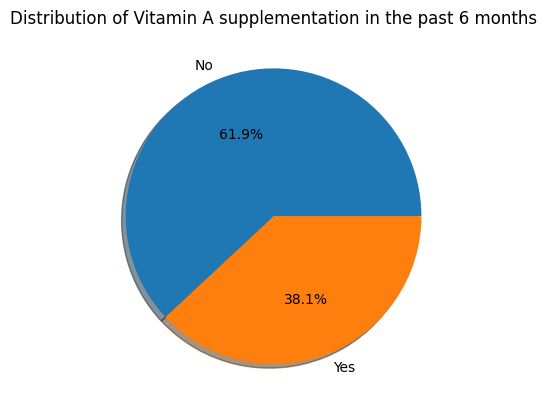

In [32]:
# Create a pie chart of the distribution of Vitamin A supplementation
result_counts = data_copy['VitaminA'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Vitamin A supplementation in the past 6 months')
# Save the figure before displaying it
plt.savefig("child_vitaminA.png")
plt.show()

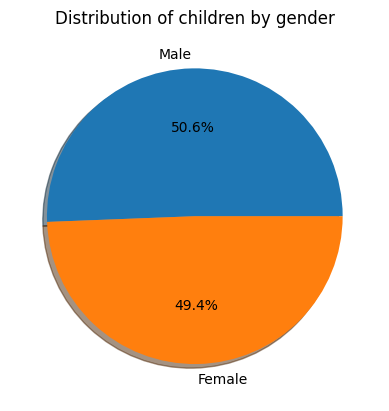

In [26]:
#Distribution of children by gender
result_counts = data_copy['child_fem'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',  shadow=True)
plt.title('Distribution of children by gender')
# Save the figure before displaying it
plt.savefig("children_gender.png")
plt.show()

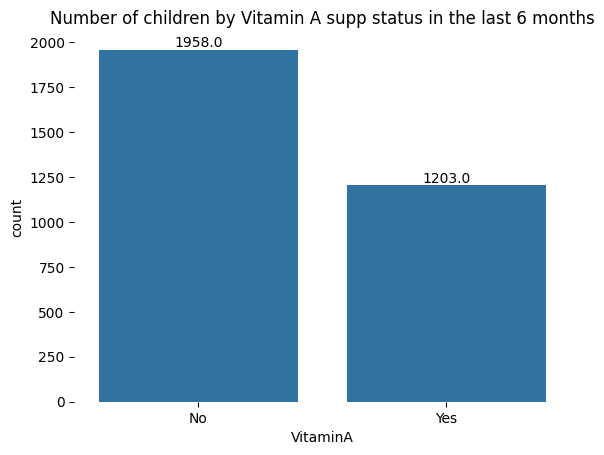

In [27]:
# Plotting the count of Vitamin A supplementation
ax = sns.countplot(x="VitaminA", data=data_copy) 
plt.title('Number of children by Vitamin A supp status in the last 6 months')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

# Remove spines
sns.despine(left=True, bottom=True)
# Save the figure before displaying it
plt.savefig("numchild_vitaminA.png")
plt.show()

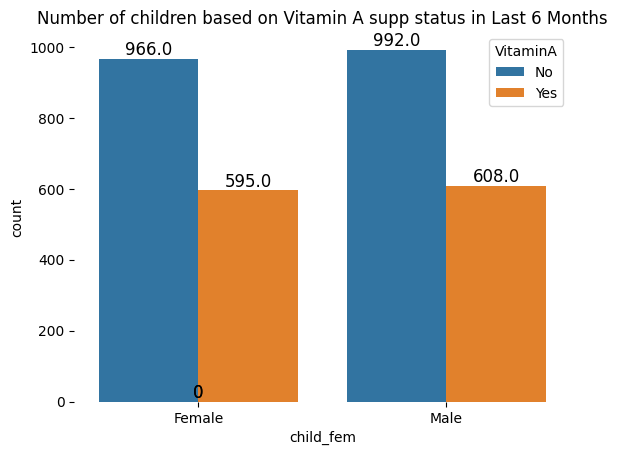

In [28]:
# Rename values in the 'child_fem' column
data_copy['VitaminA'] = data_copy['VitaminA'].replace({0: 'No', 1: 'Yes'})

ax = sns.countplot(x='child_fem', hue='VitaminA', data=data_copy)
plt.title('Number of children based on Vitamin A supp status in Last 6 Months')

# Add count values to the bars
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f"{height}", 
              xy=(p.get_x() + p.get_width() / 2, height),
              ha='center',
              va='bottom',
              fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)
# Save the figure before displaying it
plt.savefig("VitaminA_last6_Months.png")
plt.show()

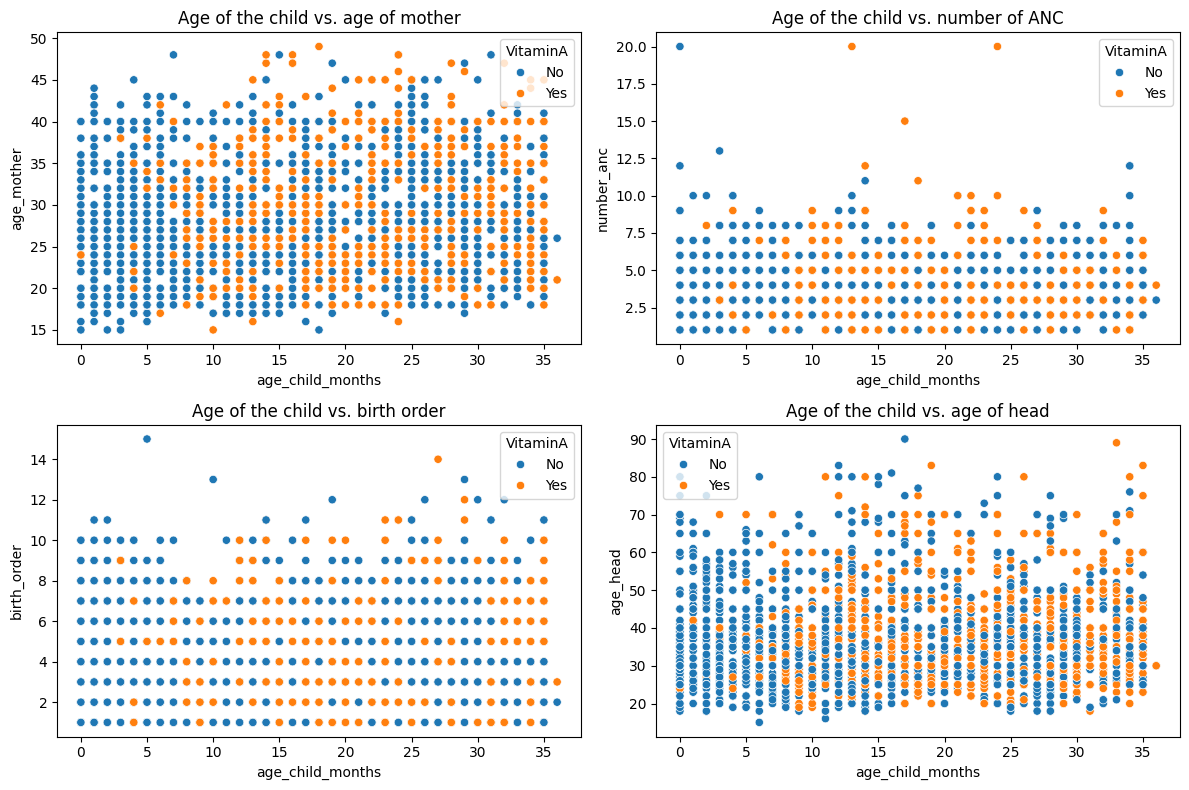

In [33]:
#Scatter plots for relevant variables versus age of the child
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Define x and y variables
x_var = 'age_child_months'
y_vars = ['age_mother', 'number_anc', 'birth_order', 'age_head']
titles = ['Age of the child vs. age of mother',
          'Age of the child vs. number of ANC',
          'Age of the child vs. birth order',
          'Age of the child vs. age of head']

# Create scatter plots
for i, y_var in enumerate(y_vars):
    ax = axes[i // 2, i % 2]
    sns.scatterplot(x=x_var, y=y_var, hue='VitaminA', data=data_copy, ax=ax)
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()
# Save the figure before displaying it
plt.savefig("child_age_vs_key_features.png")
# Display the plot
plt.show()

In [35]:
#Now, back to the original data where variables used above are not Objects 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VitaminA          3161 non-null   int64  
 1   age_mother        3161 non-null   int64  
 2   age_head          3161 non-null   int64  
 3   birth_order       3161 non-null   int64  
 4   number_anc        3161 non-null   float64
 5   age_child_months  3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  head_fem          3161 non-null   int64  
 13  telephonei        3161 non-null   int64  
 14  child_fem         3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [36]:
# Calculate the share of children who took VitaminA by gender
mean_vit_A_by_gender = data.groupby("child_fem")["VitaminA"].mean().round(3)

print(mean_vit_A_by_gender)

child_fem
0    0.380
1    0.381
Name: VitaminA, dtype: float64


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_8160\2465106381.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])
C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_8160\2465106381.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])


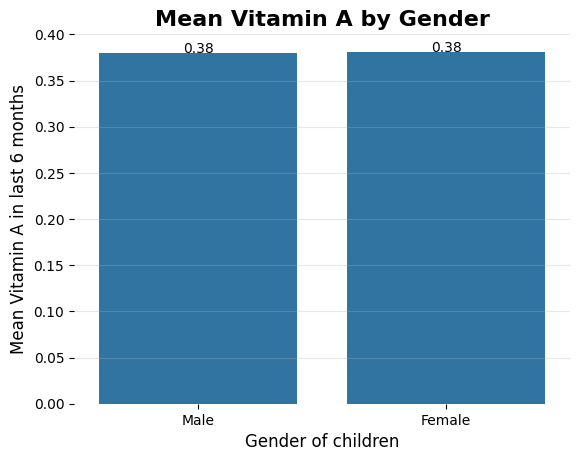

<Figure size 800x600 with 0 Axes>

In [37]:
Vit_A_gender = data.groupby('child_fem')['VitaminA'].mean().reset_index()
# Create the bar plot
ax = sns.barplot(x='child_fem', y='VitaminA', data=Vit_A_gender)

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')
    ax.set_xticklabels(['Male', 'Female'])
    
# Add plot titles and labels
plt.title('Mean Vitamin A by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender of children' , fontsize=12)
plt.ylabel('Mean Vitamin A in last 6 months' , fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

plt.figure(figsize=(8, 6))
# Save the figure before displaying it
plt.savefig("VitaminA_gender.png")
# Show the plot
plt.show()

In [38]:
#Statistical test
#T-test

In [39]:
from scipy.stats import ttest_ind

In [40]:
# Vitamin A by gender
male_vitA = data.loc[data['child_fem'] == 0, 'VitaminA']
female_vitA = data.loc[data['child_fem'] == 1, 'VitaminA']

# Compute the t-test statistic and p-value
t_statistic, p_value = ttest_ind(male_vitA, female_vitA)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on impact on the probability of Vitamin A supplementation.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on the probability of Vitamin A supplementation.")

T-Statistic: -0.07
P-Value: 0.946
Fail to reject null hypothesis: Gender has no impact on the probability of Vitamin A supplementation.


In [41]:
######

In [42]:
#!pip install statsmodels

In [43]:
import statsmodels.api as sm

In [44]:
#ODDS ratio for gender in a logistic regression model
# Create binary variables for gender and VitA status
data['is_female'] = np.where(data['child_fem'] == 1, 1, 0)
data['took_vita'] = np.where(data['VitaminA'] == 1, 1, 0)
#By converting the categorical variables (gender and Vitamin A status) into binary ones, 
#the model can better understand the relationship between gender and the target variable.

# Fit a logistic regression model with gender and VitA status as predictors
logit_model = sm.Logit(data['took_vita'], sm.add_constant(data['is_female']))
result = logit_model.fit()
#The odds ratio obtained from the logistic regression model tells me how much more likely 
#females are to take Vitamin A compared to males, holding all other factors constant.

# Print the odds ratio for gender
print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.664345
         Iterations 4
Odds Ratio for Gender: 1.00


C:\Users\Pc.DESKTOP-QQH77TU\AppData\Local\Temp\ipykernel_8160\1378908052.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))


In [45]:
#An odds ratio of 1.00 for gender means that there is no statistically significant difference in 
#the odds of taking Vitamin A between females and males based on this mode

In [46]:
#CHI-SQUARE
from scipy.stats import chi2_contingency

In [47]:
# Create a contingency table of gender and VitA status
cont_table = pd.crosstab(data['child_fem'], data['VitaminA'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender and Vitamin A supplementation status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and Vitamin A supplementation status are independent.")

Chi-Square Statistic: 0.00
P-Value: 0.975
Fail to reject null hypothesis: Gender and Vitamin A supplementation status are independent.


In [48]:
####

In [49]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VitaminA          3161 non-null   int64  
 1   age_mother        3161 non-null   int64  
 2   age_head          3161 non-null   int64  
 3   birth_order       3161 non-null   int64  
 4   number_anc        3161 non-null   float64
 5   age_child_months  3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  head_fem          3161 non-null   int64  
 13  telephonei        3161 non-null   int64  
 14  child_fem         3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   bool   
 17  

In [51]:
data.sort_index()

,VitaminA,age_mother,age_head,birth_order,number_anc,age_child_months,rural,mother_edu,water_piped,toile_improved,...,region_4,region_5,region_6,region_7,region_8,region_9,region_10,region_11,is_female,took_vita
id,,,,,,,,,,,,,,,,,,,,,
3,0,26,30,1,6.0,2,0,1,1,0,...,False,False,False,False,False,False,False,False,1,0
4,1,28,30,2,3.0,25,0,1,1,0,...,False,False,False,False,False,False,False,False,1,1
5,1,27,36,3,7.0,8,0,1,1,0,...,False,False,False,False,False,False,False,False,0,1
6,1,32,40,3,5.0,21,0,1,1,1,...,False,False,False,False,False,False,False,False,1,1
8,1,36,40,6,6.0,13,0,1,1,0,...,False,False,False,False,False,False,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1,25,25,1,4.0,29,1,0,0,0,...,False,False,False,False,False,False,False,False,1,1
5239,0,25,38,1,4.0,29,1,0,0,0,...,False,False,False,False,False,False,False,False,1,0
5271,1,25,50,1,4.0,31,1,0,0,0,...,True,False,False,False,False,False,False,False,1,1


In [52]:
# Convert columns with True and False (Boolean data type) to 1 and 0
columns_to_convert = ['wealth_indexi_1', 'wealth_indexi_2', 'wealth_indexi_3', 
                     'wealth_indexi_4', 'wealth_indexi_5', 'region_1', 'region_2', 
                     'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 
                     'region_8', 'region_9', 'region_10', 'region_11']

# Replace True with 1 and False with 0
data[columns_to_convert] = data[columns_to_convert].astype(int) 

# Print the updated DataFrame (for verification)
print(data[columns_to_convert]) 

      wealth_indexi_1  wealth_indexi_2  wealth_indexi_3  wealth_indexi_4  \
id                                                                         
3                   0                0                0                0   
4                   0                0                0                0   
5                   0                0                0                0   
6                   0                0                0                0   
8                   0                0                0                0   
...               ...              ...              ...              ...   
5218                1                0                0                0   
5239                1                0                0                0   
5271                0                0                1                0   
5321                1                0                0                0   
5374                0                0                0                0   

      wealt

In [53]:
# Print the column natures
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3161 entries, 3 to 5374
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VitaminA          3161 non-null   int64  
 1   age_mother        3161 non-null   int64  
 2   age_head          3161 non-null   int64  
 3   birth_order       3161 non-null   int64  
 4   number_anc        3161 non-null   float64
 5   age_child_months  3161 non-null   int64  
 6   rural             3161 non-null   int64  
 7   mother_edu        3161 non-null   int64  
 8   water_piped       3161 non-null   int64  
 9   toile_improved    3161 non-null   int64  
 10  electriciti       3161 non-null   int64  
 11  radioi            3161 non-null   int64  
 12  head_fem          3161 non-null   int64  
 13  telephonei        3161 non-null   int64  
 14  child_fem         3161 non-null   int64  
 15  facility_deliv    3161 non-null   int32  
 16  wealth_indexi_1   3161 non-null   int32  
 17  

In [54]:
## Drop 'took_vita' and 'is_female' columns from the DataFrame. They are duplicates
data = data.drop(['took_vita', 'is_female'], axis=1)

VitaminA            1.000000
age_child_months    0.274067
mother_edu          0.095808
region_3            0.089460
wealth_indexi_5     0.081797
age_mother          0.077767
electriciti         0.076798
region_6            0.074326
wealth_indexi_3     0.073488
region_1            0.069918
Name: VitaminA, dtype: float64


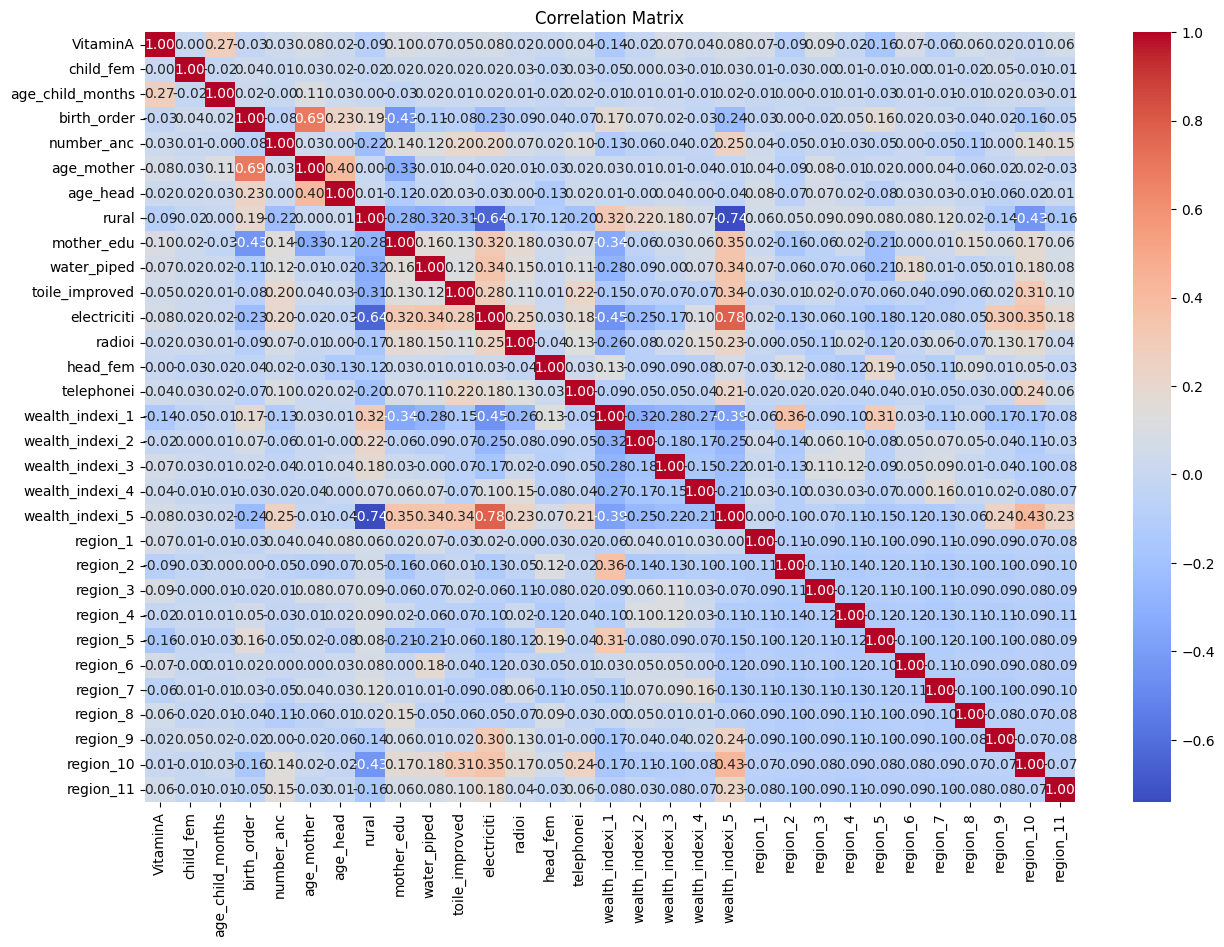

In [55]:
# Variables of interest for further analysis
import pandas as pd
variables = ['VitaminA', 'child_fem', 'age_child_months', 'birth_order', 'number_anc', 
             'age_mother', 'age_head', 'rural', 'mother_edu', 'water_piped', 
             'toile_improved', 'electriciti', 'radioi', 'head_fem', 'telephonei', 
             'wealth_indexi_1', 'wealth_indexi_2', 'wealth_indexi_3', 
             'wealth_indexi_4', 'wealth_indexi_5', 'region_1', 'region_2', 'region_3', 
             'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 
             'region_9', 'region_10', 'region_11']

# Calculate correlation matrix
correlation_matrix = data[variables].corr()

# Sort the correlations for the 'VitaminA' column in descending order
vitamin_a_correlations = correlation_matrix['VitaminA'].sort_values(ascending=False)

# Get the top 10 correlations
top_10_correlations = vitamin_a_correlations.head(10)

print(top_10_correlations)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
# Save the figure before displaying it
plt.savefig("correlation_matrix.png")
plt.show()

In [56]:
# Get the index name
index_name = data.index.name

print("The index name is:", index_name)

The index name is: id


In [48]:
#Splitting data into Training and Testing samples

We split 80% of data as training data and the rest 20% is used as testing data.

In [49]:
data.columns

Index(['VitaminA', 'age_mother', 'age_head', 'birth_order', 'number_anc',
       'age_child_months', 'rural', 'mother_edu', 'water_piped',
       'toile_improved', 'electriciti', 'radioi', 'head_fem', 'telephonei',
       'child_fem', 'facility_deliv', 'wealth_indexi_1', 'wealth_indexi_2',
       'wealth_indexi_3', 'wealth_indexi_4', 'wealth_indexi_5', 'region_1',
       'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'region_8', 'region_9', 'region_10', 'region_11'],
      dtype='object')

In [50]:
X = data.drop(['wealth_indexi_1','region_1','VitaminA', 'electriciti', 'rural'],axis=1) 
y = data['VitaminA']

In [51]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=101)

In [52]:
# Check the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (2528, 27)
y_train -  (2528,)
X_test -  (633, 27)
y_test -  (633,)


Baseline for models
We will use: Classification Models
    Logistic Regression
    Decision Trees
    Random Forest
    SVM
    XGBoost
    LightGBM

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
#RUN ALL MODELS

In [55]:
# Separate features (X) and target variable (y)
X = data.drop(['wealth_indexi_1', 'region_1', 'VitaminA', 'electriciti', 'rural'], axis=1) #Remove one dummy from each of wealth and region dummies, highly correlatd features wealth wealth removed
y = data['VitaminA']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model objects
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

In [56]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    results[model_name] = {'Accuracy': accuracy, 
                          'Precision': precision, 
                          'Recall': recall, 
                          'F1-score': f1, 
                          'AUC': auc}

[LightGBM] [Info] Number of positive: 960, number of negative: 1568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 2528, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379747 -> initscore=-0.490623
[LightGBM] [Info] Start training from score -0.490623


In [57]:
# Create a DataFrame to display results
performance_df = pd.DataFrame(results).T

# Print the performance table
print("Performance Measures of Various Classifiers:")
print(performance_df)

Performance Measures of Various Classifiers:
                     Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression  0.699842   0.654971  0.460905  0.541063  0.654812
Decision Tree        0.646130   0.541850  0.506173  0.523404  0.619753
Random Forest        0.690363   0.615764  0.514403  0.560538  0.657202
KNN                  0.601896   0.477612  0.395062  0.432432  0.562915
SVM                  0.617694   1.000000  0.004115  0.008197  0.502058
XGBoost              0.646130   0.543379  0.489712  0.515152  0.616651
LightGBM             0.669826   0.577273  0.522634  0.548596  0.642086


In [59]:
# Export the DataFrame to an Excel file
performance_df.to_excel('my_table.xlsx')

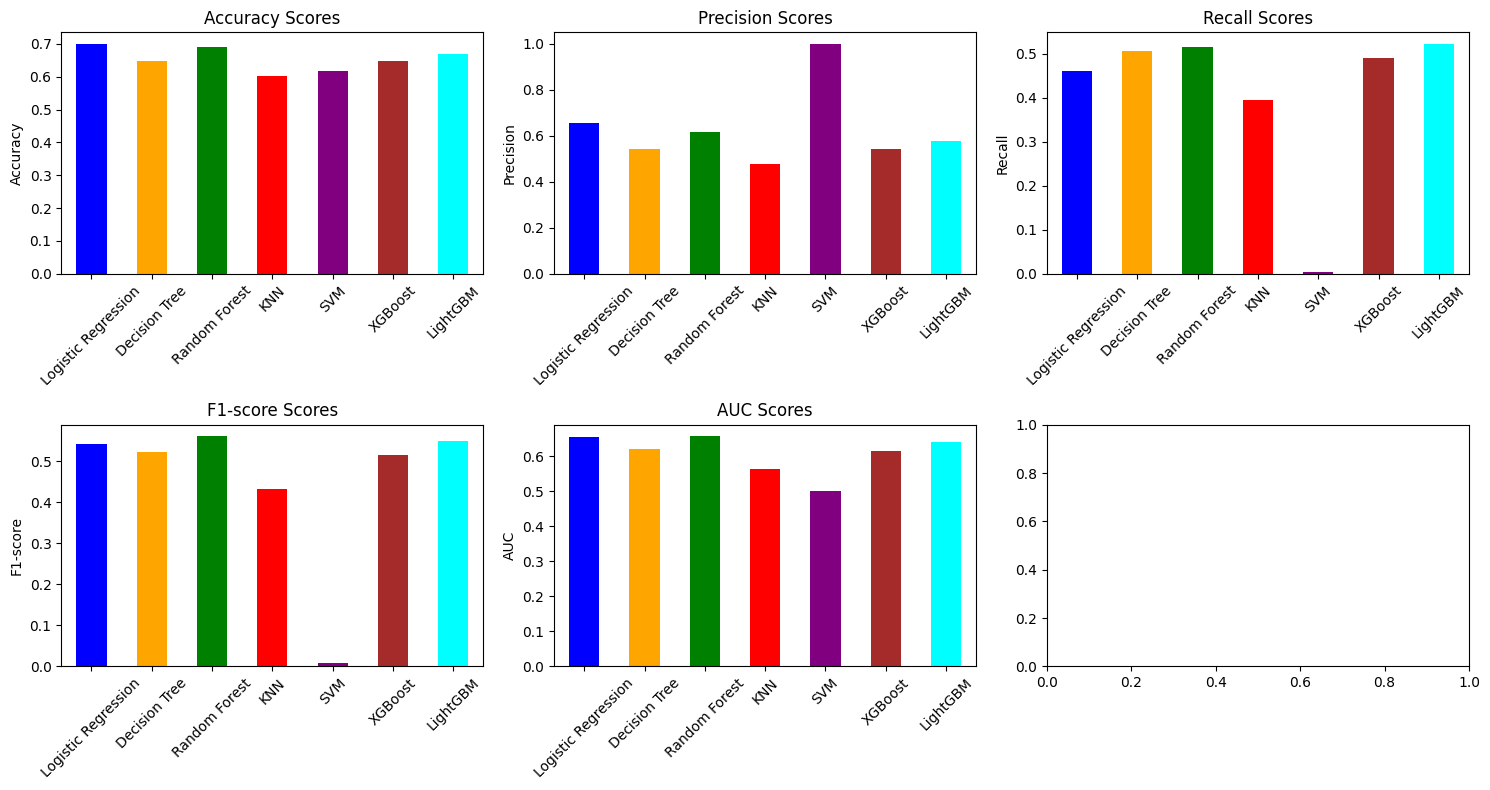

In [61]:
# Plot graphs to show the performances of each classifier - bar chart
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan']  # Define colors for each model

for i, (metric, ax) in enumerate(zip(performance_df.columns, axes)):
    performance_df[metric].plot(kind='bar', ax=ax, color=colors) 
    ax.set_title(f'{metric} Scores')
    ax.set_ylabel(metric)
    ax.set_xticklabels(performance_df.index, rotation=45)

plt.tight_layout()
# Save the figure before displaying it
plt.savefig("performance_metrics.png")
plt.show()

In [67]:
####

In [173]:
#Selecting the Best Model:
#Based on the provided metrics, Random Forest appears to be the most promising model. 
#It has the highest accuracy and AUC, indicating good overall performance and class separation. 
#Additionally, it maintains a reasonable balance between precision and recall.

In [62]:
#More on the best model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
# Separate features (X) and target variable (y)
X = data.drop(['wealth_indexi_1', 'region_1', 'VitaminA', 'electriciti', 'rural'], axis=1)
y = data['VitaminA']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Predicted probabilities

In [63]:
# Predicted values counts
predicted_no = sum(y_pred == 0)
predicted_yes = sum(y_pred == 1)
print(f"Predicted Values Counts:\nNo: {predicted_no}\nYes: {predicted_yes}")

# Actual values counts
actual_no = sum(y_test == 0)
actual_yes = sum(y_test == 1)
print(f"Actual Values Counts:\nNo: {actual_no}\nYes: {actual_yes}")

Predicted Values Counts:
No: 432
Yes: 201
Actual Values Counts:
No: 390
Yes: 243


In [64]:
# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [65]:
print(f"Accuracy: {accuracy:.2f}")
print(f"AUC Score: {auc_score:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.67
AUC Score: 0.75
Confusion Matrix:
 [[307  83]
 [125 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       390
           1       0.59      0.49      0.53       243

    accuracy                           0.67       633
   macro avg       0.65      0.64      0.64       633
weighted avg       0.66      0.67      0.66       633



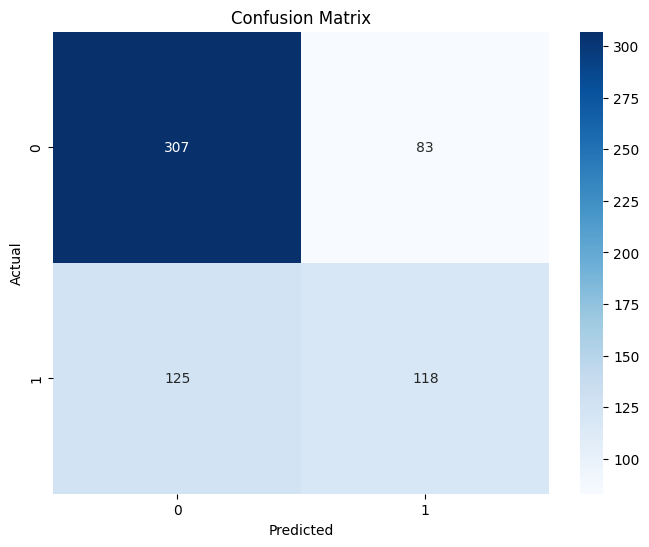

In [66]:
# Visualize Confusion Matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix_RF.png")
plt.show()

In [67]:
#!pip install openpyxl

In [68]:
# Export the DataFrame to an Excel file
#Commit Changes and Save data
data.to_csv('EDHS2019_Final.csv') 

In [69]:
#Which features are the best predictors?

In [70]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print top 10 features
print("\nTop 10 Features by Importance:")
print(feature_importance_df.head(10))


Top 10 Features by Importance:
             Feature  Importance
4   age_child_months    0.235117
1           age_head    0.136248
0         age_mother    0.123386
2        birth_order    0.088400
3         number_anc    0.073110
11         child_fem    0.030540
6        water_piped    0.027878
8             radioi    0.026112
5         mother_edu    0.024155
20          region_5    0.021719


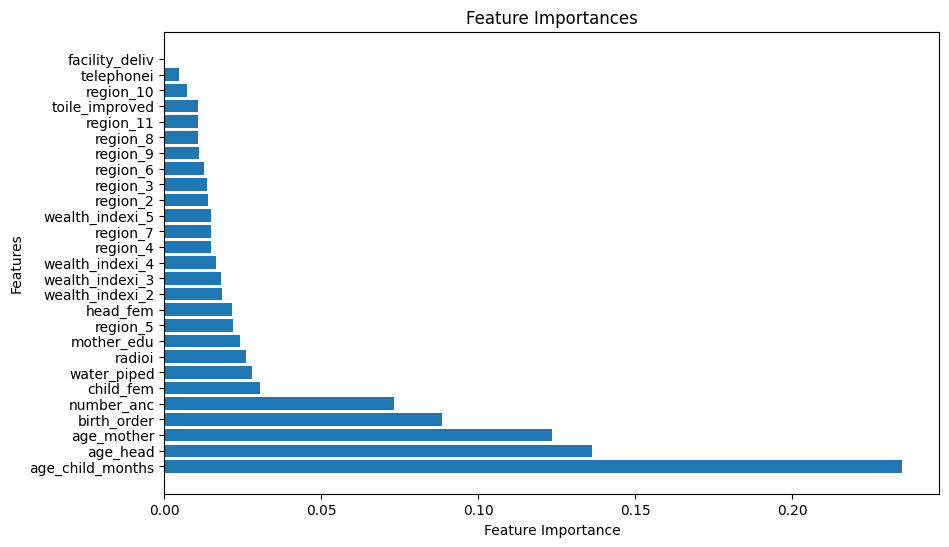

In [71]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.savefig("best_features.png")
plt.show()

In [184]:
#Random Forest classifier:
#OVERALL PERFORMANCE
#Accuracy (0.69): The model correctly predicts the outcome for approximately 69% of the instances.  This is a reasonable overall accuracy, suggesting the model performs decently on the dataset.
#AUC (0.66):  A moderate AUC score, suggesting reasonable overall model performance in distinguishing between classes. While not exceptional, it indicates the model has some ability to separate the classes.

#SPECIFIC PERFORMANCE
#Precision (0.62): When the model predicts a sample belongs to a certain class (e.g., "positive"), it is correct 62% of the time. This suggests a relatively moderate rate of false positives (incorrectly predicting a sample as belonging to that class).
#Recall (0.51): The model correctly identifies only 51% of the actual samples that belong to a certain class. This suggests a relatively moderate rate of false negatives (failing to identify samples that truly belong to that class).
#F1-score (0.56):  A moderate F1-score, representing a balance between precision and recall.  This indicates moderate performance in terms of both correctly identifying positive cases and minimizing false positives/negatives.  It suggests there's room for improvement in achieving a better balance or prioritizing one metric if needed.

In [185]:
#!pip install xgboost lightgbm